<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/MK_ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import numpy as np


##Regression

In [3]:
## check dataset
california_housing = fetch_california_housing()

In [4]:
## split data
X_train0, X_test, y_train0,  y_test = train_test_split(california_housing["data"],
                                                    california_housing["target"])

In [5]:
## split train to train and validation
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [6]:
## check shape of train and test
print(X_train1.shape)
print(X_test.shape)
print(X_validation.shape)

(11610, 8)
(5160, 8)
(3870, 8)


In [7]:
## Standardization
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

Create Model

In [8]:
## create Model
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)]
)

In [9]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [10]:
history = model.fit(X_train_s, y_train1, epochs=30, validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.7220 - mean_absolute_error: 0.5987 - val_loss: 0.6933 - val_mean_absolute_error: 0.5114
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5752 - mean_absolute_error: 0.4993 - val_loss: 0.4632 - val_mean_absolute_error: 0.5048
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4454 - mean_absolute_error: 0.4775 - val_loss: 0.4236 - val_mean_absolute_error: 0.4664
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4229 - mean_absolute_error: 0.4624 - val_loss: 0.4004 - val_mean_absolute_error: 0.4507
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4079 - mean_absolute_error: 0.4536 - val_loss: 0.3900 - val_mean_absolute_error: 0.4437
Epoch 6/30
363/363 [==============================] - 3s 8ms/step - loss: 0.3967 - mean_absolute_error: 0.4468 - val_loss: 0.4008 - val_mean_absolute_error: 0.4375
Epoch 7/30
363/3

## Functional API

In [11]:
X_train0.shape[1:]

(8,)

In [12]:
input_layer = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
cancatenate_layer = keras.layers.Concatenate()([input_layer, hidden_layer_2])
output_layer = keras.layers.Dense(1)(cancatenate_layer)
model_conc = keras.Model(inputs=[input_layer], outputs=[output_layer])


In [13]:
model_conc.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 50)                   450       ['input_1[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 10)                   510       ['dense_3[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 18)                   0         ['input_1[0][0]',             
                                                                     'dense_4[0][0]']         

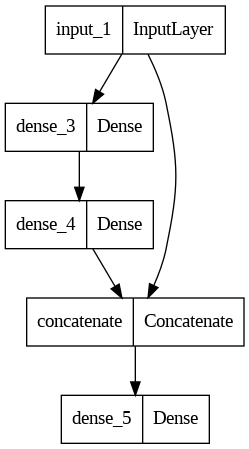

In [14]:
keras.utils.plot_model(model_conc, "model_pic.png")

In [15]:
model_conc.compile(loss="mean_squared_error",
                   optimizer="sgd",
                   metrics="mean_absolute_error")

In [16]:
model_conc.fit(X_train_s, y_train1, epochs = 30,
               validation_data = (X_validation_s, y_validation) )

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.5175 - mean_absolute_error: 0.7019 - val_loss: 3.1384 - val_mean_absolute_error: 0.5385
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 4.9338 - mean_absolute_error: 0.6100 - val_loss: 48.5026 - val_mean_absolute_error: 0.7765
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 206.5499 - mean_absolute_error: 1.8102 - val_loss: 1046.5006 - val_mean_absolute_error: 3.5454
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 347600544.0000 - mean_absolute_error: 1179.3489 - val_loss: 3394.5525 - val_mean_absolute_error: 28.4417
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 1844.2736 - mean_absolute_error: 15.3206 - val_loss: 29104.2910 - val_mean_absolute_error: 16.3811
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 26353.1738 - mean_absolute_error: 16.6207 - val_loss: 484262.3750 - val_mean

## funcitonal API with multiple input

In [17]:
X_train_s_1, X_train_s_2 = X_train_s[: , :6], X_train_s[: , -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[: , :6], X_validation_s[: , -4:]
X_test_s_1, X_test_s_2 = X_test_s[: , :6], X_test_s[: , -4:]

In [18]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1)(concatenation_layer)
model_multiple = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer])

In [19]:
model_multiple.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 50)                   350       ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 10)                   510       ['dense_6[0][0]']             
                                                                                            

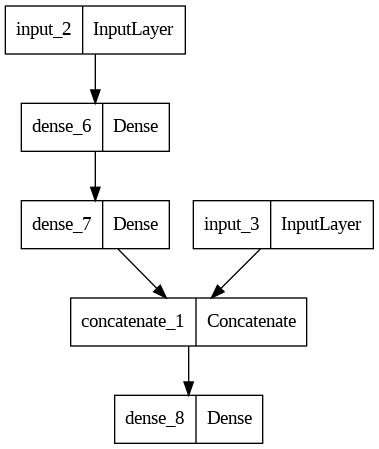

In [20]:
keras.utils.plot_model(model_multiple, "multiple_model.png")

In [21]:
model_multiple.compile(loss="mean_squared_error",
                       optimizer="sgd",
                       metrics="mean_absolute_error")

In [22]:
model_multiple.fit((X_train_s_1, X_train_s_2), y_train1, epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), y_validation))

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7942 - mean_absolute_error: 0.6187 - val_loss: 0.5874 - val_mean_absolute_error: 0.5511
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5484 - mean_absolute_error: 0.5370 - val_loss: 1.0965 - val_mean_absolute_error: 0.5424
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8390 - mean_absolute_error: 0.5234 - val_loss: 5.1624 - val_mean_absolute_error: 0.5122
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 108.5253 - mean_absolute_error: 1.1545 - val_loss: 3.7102 - val_mean_absolute_error: 0.7361
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 4.2206 - mean_absolute_error: 0.7504 - val_loss: 50.6963 - val_mean_absolute_error: 0.7716
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 174.2831 - mean_absolute_error: 2.3963 - val_loss: 15011.8408 - val_mean_absolute_error: 4.0496
Epoch 7

## with multiple output

In [26]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1, name="output_layer")(concatenation_layer)
helper_output = keras.layers.Dense(1,name = "helper_output")(hidden_layer_2)
model_multiple_output = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer, helper_output])

In [28]:
model_multiple_output.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 50)                   350       ['input_6[0][0]']             
                                                                                                  
 input_7 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 10)                   510       ['dense_11[0][0]']            
                                                                                            

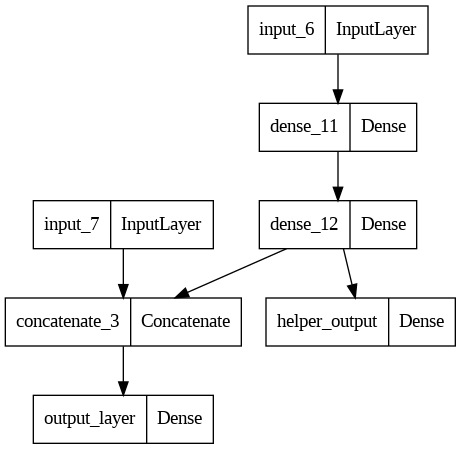

In [29]:
keras.utils.plot_model(model_multiple_output, "multiple_model.png")

In [30]:
model_multiple_output.compile(loss=["mse", "mse"],
                              loss_weights = [0.8, 0.2],
                              optimizer="sgd",
                              metrics=["mae"])

In [33]:
model_multiple_output.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), (y_validation,y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 1.8447 - output_layer_loss: 1.9330 - helper_output_loss: 1.4916 - output_layer_mae: 0.7257 - helper_output_mae: 0.8569 - val_loss: 3.8253 - val_output_layer_loss: 3.8176 - val_helper_output_loss: 3.8562 - val_output_layer_mae: 0.5238 - val_helper_output_mae: 0.6177
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 3.9534 - output_layer_loss: 4.0204 - helper_output_loss: 3.6853 - output_layer_mae: 0.5631 - helper_output_mae: 0.6394 - val_loss: 24.5996 - val_output_layer_loss: 30.5920 - val_helper_output_loss: 0.6300 - val_output_layer_mae: 0.6226 - val_helper_output_mae: 0.5839
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 54.4209 - output_layer_loss: 67.8666 - helper_output_loss: 0.6381 - output_layer_mae: 0.9065 - helper_output_mae: 0.6007 - val_loss: 283.5885 - val_output_layer_loss: 354.2974 - val_helper_output_loss: 0.7529 - val_output_layer_mae: 1.3665 - va